#### Hi all.  🙋

#### We continue our **Beginner-Intermediate Friendly Machine Learning series**, which would help anyone who wants to learn or refresh the basics of ML.

#### What we have covered: 

#### [Beginner Friendly Detailed Explained EDAs – For anyone at the beginnings of DS/ML journey](https://www.kaggle.com/general/253911#1393015) ✔️

#### [BIAS & VARIANCE TRADEOFF](https://www.kaggle.com/kaanboke/ml-basics-bias-variance-tradeoff) ✔️

#### [LINEAR ALGORITHMS](https://www.kaggle.com/kaanboke/ml-basics-linear-algorithms)  ✔️

#### [NONLINEAR ALGORITHMS](https://www.kaggle.com/kaanboke/nonlinear-algorithms)  ✔️

#### [The Most Used Methods to Deal with MISSING VALUES](https://www.kaggle.com/kaanboke/the-most-used-methods-to-deal-with-missing-values)  ✔️

#### [Beginner Friendly End to End ML Project- Classification with Imbalanced Data](https://www.kaggle.com/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy)  ✔️

#### [How to Prevent the Data Leakage ?](https://www.kaggle.com/kaanboke/how-to-prevent-the-data-leakage) ✔️

#### [The Most Common EVALUATION METRICS- A Gentle Intro](https://www.kaggle.com/kaanboke/the-most-common-evaluation-metrics-a-gentle-intro) ✔️

#### [Feature Selection-The Most Common Methods to Know](https://www.kaggle.com/kaanboke/feature-selection-the-most-common-methods-to-know) ✔️

#### [Beginner Friendly End to End ML Project- Car Price Prediction](https://www.kaggle.com/kaanboke/car-price-prediction-beginner-friendly-94-3)  ✔️

#### [Beginner Friendly CATBOOST with OPTUNA](https://www.kaggle.com/kaanboke/beginner-friendly-catboost-with-optuna)  ✔️

#### [A Gentle Intro to PYCARET-Beginner Friendly](https://www.kaggle.com/kaanboke/a-gentle-intro-to-pycaret-beginner-friendly)  ✔️


#### In this notebook, we will look in detail at how the famous trio (**XGBoost & LightGBM & Catboost**) handle the imbalanced data.


#### **Enjoy** 🤘

![](https://www.questionpro.com/blog/wp-content/uploads/2018/02/Customer-Churn.jpg)

Image Credit: https://www.questionpro.com

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [Data](#0)
* [What Problem We Have and Which Metric to Use?](#1)

* [Exploratory Data Analysis](#2)
    * [Target Variable](#3)
    * [Numerical Features](#4)
    * [Categorical Features](#5)
    * [Overall Insights](#6)
      
      
* [How Famous Trio (XGBoost & LightGBM & Catboost) Deal With Imbalanced Data?](#7) 


* [CATBOOST](#8)
    * [CatBoost (with default Parameters) Deals With Imbalanced Data](#9)
    * [CatBoost (with adjusted Scale_Pos_Weight = 3) Deals With Imbalanced Data](#10)
    * [CatBoost (with adjusted Scale_Pos_Weight = 5) Deals With Imbalanced Data](#11)


* [XGBOOST](#12)    
    * [XGBoost (with default Parameters) Deals With Imbalanced Data](#13)    
    * [XGBoost (with adjusted Scale_Pos_Weight) Deals With Imbalanced Data](#14)
    * [XGBoost (with adjusted Scale_Pos_Weight = 5) Deals With Imbalanced Data](#15)


* [LightGBM](#16)
    * [LightGBM (with default Parameters) Deals With Imbalanced Data](#17)    
    * [LightGBM (with adjusted Scale_Pos_Weight) Deals With Imbalanced Data](#18)
    * [LightGBM (with adjusted Scale_Pos_Weight = 5) Deals With Imbalanced Data](#19)
 
 
* [Final Result Table and Model Comparison](#20)

* [Conclusion](#21)

* [Further Reading](#22)

<a id="0"></a>
<font color="Darkblue" size=+2.5><b>Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

# **Telco Customer Churn**

### **Data Dictionary**

1. **`CustomerID`**: A unique ID that identifies each customer.

2. **`Gender`**: The customer’s gender: Male, Female

3. **`Age`**: The customer’s current age, in years, at the time the fiscal quarter ended.

4. **`Senior Citizen`**: Indicates if the customer is 65 or older: Yes, No

5. **`Married (Partner)`**: Indicates if the customer is married: Yes, No

6. **`Dependents`**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

7. **`Number of Dependents`**: Indicates the number of dependents that live with the customer.

8. **`Phone Service`**: Indicates if the customer subscribes to home phone service with the company: Yes, No

9. **`Multiple Lines`**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No ,No phone service

10. **`Internet Service`**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

11. **`Online Security`**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

12. **`Online Backup`**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

13. **`Device Protection Plan`**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

14. **`Premium Tech Support`**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

15. **`Streaming TV`**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

16. **`Streaming Movies`**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

17. **`Contract`**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

18. **`Paperless Billing`**: Indicates if the customer has chosen paperless billing: Yes, No

19. **`Payment Method`**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

20. **`Monthly Charge`**: Indicates the customer’s current total monthly charge for all their services from the company.

21. **`Total Charges`**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

22. **`Tenure`**: Indicates the total amount of months that the customer has been with the company.

23. **`Churn`**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Reference:
https://www.kaggle.com/blastchar/telco-customer-churn

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113



<a id="1"></a>
<font color="Darkblue" size=+1.5><b>What Problem We Have and Which Metric to Use?</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Based on the data and data dictionary, We have a classification problem.
- We wil make classification on the target variable **`Churn`**
- And we will build a model to get best classification possible on the target variable.
- For that we will look at the balance of the target variable.
- As we will see later, our target variable has imblanced data
- For that reason we are not going to use Accuracy score, 
- Based on the problem on the hand, we will use **`Recall score`**.
- [For the detailed info about the evaluation metrics](https://www.kaggle.com/kaanboke/the-most-common-evaluation-metrics-a-gentle-intro)

![](https://e7.pngegg.com/pngimages/301/649/png-clipart-snake-scale-measuring-scales-measurement-scale-light-fixture-measuring-scales-thumbnail.png)

Image Credit: https://e7.pngegg.com

<a id="2"></a>
<font color="Darkblue" size=+2.5><b>Exploratory Data Analysis</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Let's import the libraries

In [2]:
pip install optuna


     ------------------------------------ 390.6/390.6 kB 419.3 kB/s eta 0:00:00
     ------------------------------------ 224.5/224.5 kB 759.9 kB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install shap

     ------------------------------------ 435.6/435.6 kB 394.5 kB/s eta 0:00:00



In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer ##imputing missing values
from statsmodels.tools import add_constant as add_constant ## Adding constant
import statsmodels.api as sm ## for applying logistic regression 
from sklearn.model_selection import cross_val_score,cross_val_predict, train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer,LabelEncoder

import scipy.stats as stats ## for chi square test

from sklearn.metrics import accuracy_score,classification_report, recall_score,confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc, plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score

##Creating pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

import optuna
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier



#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import shap 

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

- Let's look at the data.

In [17]:
pd.options.display.max_rows = 25
pd.options.display.max_columns = 25

pd.set_option('max_colwidth',200)

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
0              29.85        29.85    No  
1              56.95       1889.5    No  
2              53.85       108.15   Yes  
3              42.30      1840.75    No  
4              70.70       151.65   Yes  
...              ...          ...   ...  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No  

[7043 rows x 21 columns]

- Duplicated and Missing Value check

In [11]:
df.duplicated().sum()

0

In [12]:
## Functions for getting the missing values and percentage 
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

Missing_Number  Missing_Percent
customerID                     0              0.0
DeviceProtection               0              0.0
TotalCharges                   0              0.0
MonthlyCharges                 0              0.0
PaymentMethod                  0              0.0
PaperlessBilling               0              0.0
Contract                       0              0.0
StreamingMovies                0              0.0
StreamingTV                    0              0.0
TechSupport                    0              0.0
OnlineBackup                   0              0.0
gender                         0              0.0
OnlineSecurity                 0              0.0
InternetService                0              0.0
MultipleLines                  0              0.0
PhoneService                   0              0.0
tenure                         0              0.0
Dependents                     0              0.0
Partner                        0              0.0
SeniorCitizen                  0              0.0
Churn                          0              0.0

- Dataset does not have any duplicated and mising values. But don't be sure, always look deeper.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## After first sight, what we will do next?
-  We won't use **`customerID`**, so we will drop it. Doesnt provide any information.
- **`Total charges`** has object type we will change it to float type.
- **`Tenure`** has integer type we will change it to float type, for catboost model.
-  We will look at the cardinality of the categorical variables.
-  We will encode target variable (**`churn`**) to numeric type by using label encoding. 

In [20]:
df1 = df.drop('customerID',axis=1).copy()

In [23]:
df1["TotalCharges"].astype("float64")

ValueError: could not convert string to float: ''

In [29]:
df1[df["TotalCharges"] == ' '].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- Data coding is always to be examined carefully.
- When we try to change the datatype of the `Total charges` from object type to float type, we will get error.
- Let's see what is the reason?

- Even though we don't see any missing values, when we look at the data, `total charges` feature has missing values.

- We will make the correct coding to define misisng values.

In [30]:
df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

In [31]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df1)

Missing_Number  Missing_Percent
TotalCharges                  11         0.001562
gender                         0         0.000000
SeniorCitizen                  0         0.000000
MonthlyCharges                 0         0.000000
PaymentMethod                  0         0.000000
PaperlessBilling               0         0.000000
Contract                       0         0.000000
StreamingMovies                0         0.000000
StreamingTV                    0         0.000000
TechSupport                    0         0.000000
DeviceProtection               0         0.000000
OnlineBackup                   0         0.000000
OnlineSecurity                 0         0.000000
InternetService                0         0.000000
MultipleLines                  0         0.000000
PhoneService                   0         0.000000
tenure                         0         0.000000
Dependents                     0         0.000000
Partner                        0         0.000000
Churn                          0         0.000000

- We'll deal with the missing values after looking at the data distribution 

<a id="3"></a>
<font color="Darkblue" size=+1.5><b>Target Variable</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [32]:
y = df1['Churn']
print(f'Percentage of Churn:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} customer)\nPercentage of customer did not churn: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} customer)')


Percentage of Churn:  26.54 %  --> (1869 customer)
Percentage of customer did not churn: 73.46  %  --> (5174 customer)


In [33]:
y.iplot(kind='hist', title= 'Churn')

- We have imbalanced data.
- Almost 27% of the customers didn't continue with the company and churned.
- 1869 customer churned.
- Almost 73% of the customers continue with the company and didn't churn.
- 5174 customer didn't churn.


In [58]:
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])

- For further usage, let's get the list of the numerical and categorical features.

In [57]:
numerical= df1.select_dtypes('number').columns

categorical = df1.select_dtypes('object').columns

print(f'Numerical Columns:  {df1[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df1[categorical].columns}')

Numerical Columns:  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


Categorical Columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


<a id="4"></a>
<font color="Darkblue" size=+1.5><b>Numerical Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [56]:
##Summary of numerical features
df1['tenure']= df1['tenure'].astype(float)
numerical= df1.select_dtypes('number').columns

df1[numerical].describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count    7043.000000  7043.000000     7043.000000   7043.000000  7043.000000
mean        0.162147    32.371149       64.761692   2283.300441     0.265370
std         0.368612    24.559481       30.090047   2265.000258     0.441561
min         0.000000     0.000000       18.250000     18.800000     0.000000
25%         0.000000     9.000000       35.500000    402.225000     0.000000
50%         0.000000    29.000000       70.350000   1400.550000     0.000000
75%         0.000000    55.000000       89.850000   3786.600000     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000

In [37]:
df1[['tenure', 'MonthlyCharges', 'TotalCharges']].iplot(kind='histogram',subplots=True,bins=50)

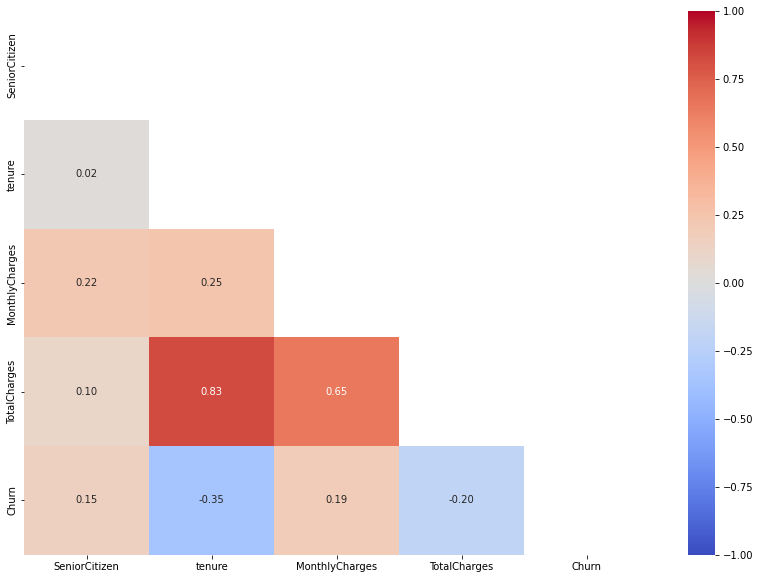

In [38]:
matrix = np.triu(df1[numerical].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df1[numerical].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

* Based on the matrix, we can observe weak level correlation between the numerical features and the target variable
* There is strong correlation between tenure and total charges.
* Being senior citizen and increasing monthly charges have a positive correlation with the churn.
* Senior citizen more likely churn than younger customers.
* Customer with higher monthly charges also more likely churn than lesser monthly charges customers.
* Being long term with the company, customer less likely churn than customer  with lesser time with the company.
* Total charges has negative correlation with the churn.

In [49]:
## Treating Missing Values

imputer = KNNImputer(n_neighbors=3, weights="uniform")

df1['TotalCharges'] = imputer.fit_transform(df1[['TotalCharges']])


## Univariate Analysis (Numerical Feature) vs Target

In [50]:
def numerical_univariate(df):
    df  = add_constant(df)
    logit_model=sm.Logit(df1["Churn"],df)
    model=logit_model.fit()
    print(df.columns[1])
    print(model.summary())

In [52]:
for i in range(len(numerical)-1):
    numerical_univariate(df1[numerical[i]])

Optimization terminated successfully.
         Current function value: 0.568022
         Iterations 5
SeniorCitizen
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7041
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Jul 2023   Pseudo R-squ.:                 0.01828
Time:                        17:08:06   Log-Likelihood:                -4000.6
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                 2.880e-34
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.1744      0.031    -38.311      0.000      -1.234      -1.114
Senior

## Interpretation 

- **`SeniorCitizen`** the odds of churning increases 2.35 times with a person being a senior citizen
- **`tenure`**  the odds of churning decreases 0.961 times with a unit increase in tenure
- **`Monthly Charges`** the odds of churning increases 1.01 times with a unit increase in monthly charges
- **`Total Charges`** the odds of churning increases 1.0002 times with a unit increase in Total charges

<a id="5"></a>
<font color="Darkblue" size=+1.5><b>Categorical Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Let's see cardinality of the categorical features.

In [59]:
df1[categorical].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

- Data does not have a high cardinality or zero variance issues. 

- Let's see the unique values of the categorical features.

In [60]:
for feature in df1[categorical]:
        print(f'{feature}: {df[feature].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


- We can see that **`No internet service`** is repeating several times in the features and in this problem at hand, it gives same meaning as **No**
- So we can change them to **No** and then features will have two unique values, 
- Also **`MultipleLines`** has **`No phone service`** option, which in this problem gives same meaning as **No** so we can change it to **No** and do the same thing for this feature.
- Lets'start with the bivariate analysis and on the way we will make the relevant changes.

### **Gender and Churn**

In [81]:
print (f'A female customer has a probability of {round(df1[df1["gender"]=="Female"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A male customer has a probability of {round(df1[df1["gender"]=="Male"]["Churn"].mean()*100,2)} % churn')

print()

A female customer has a probability of 26.92 % churn

A male customer has a probability of 26.16 % churn



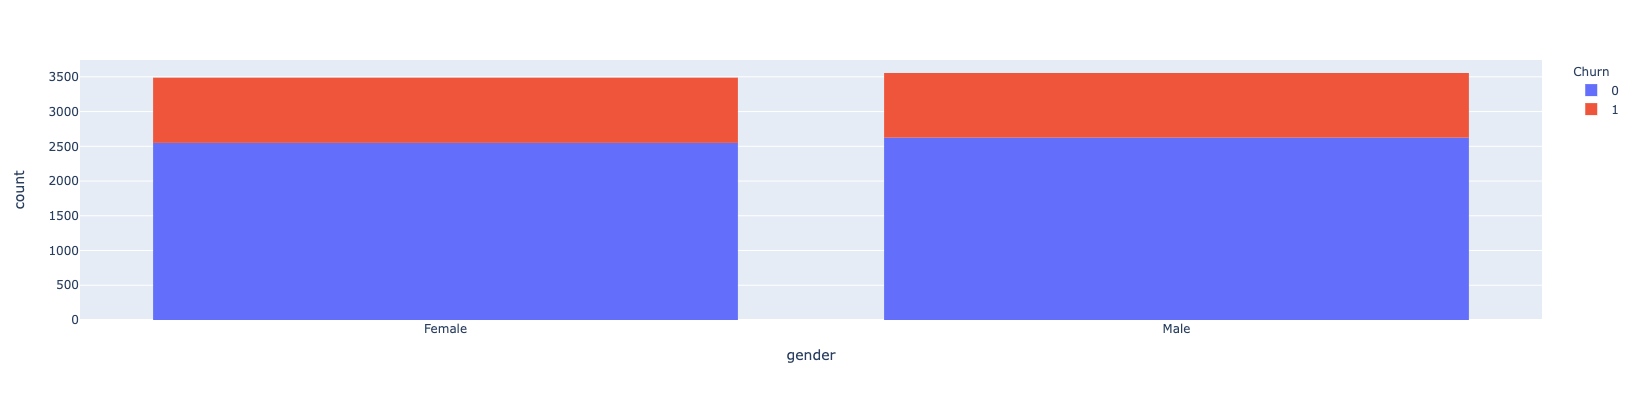

In [98]:
fig = px.histogram(df1, x="gender", color="Churn",width=400, height=400)
fig.show()

- There is not much difference between gender on the churn rate.

In [82]:
# Table of Customer Age vs. fraud
gender_churn_count = pd.crosstab(index=df1["gender"],columns=df1["Churn"])
print(gender_churn_count)

## Probability distribution table 

gender_churn_prob = np.array(gender_churn_count)
gender_churn_prob= gender_churn_prob.astype(float)

for i in range(gender_churn_prob.shape[0]):
    gender_churn_prob[i]=(gender_churn_prob[i]/gender_churn_prob[i].sum())

gender_churn_prob = pd.DataFrame(gender_churn_prob , columns=gender_churn_count.columns ,index = gender_churn_count.index) 

print("\n")
print("Probability distribution table")
print("\n")
print(gender_churn_prob)


#perform the Chi-Square Test of Independence
chi_square_test_statistic, p_value , deg_of_free , Expec_val = stats.chi2_contingency(np.array(gender_churn_count))

# chi square test statistic and p value and Dof
print("\n")
print('chi_square_test_statistic is : ' + str(chi_square_test_statistic))
print("\n")
print('p_value : ' + str(p_value))
print("\n")
print('degree of freedom : ' + str(deg_of_free))
pd.DataFrame(Expec_val) #expected value under H0

Churn      0    1
gender           
Female  2549  939
Male    2625  930


Probability distribution table


Churn          0         1
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


chi_square_test_statistic is : 0.4840828822091383


p_value : 0.48657873605618596


degree of freedom : 1


0           1
0  2562.389891  925.610109
1  2611.610109  943.389891

- Since p value is greter than 0.05 , therefore we do not have sufficient evidence against h0. 

### **Having Partner and Churn**

In [99]:
print (f'A customer with a partner has a probability of {round(df1[df1["Partner"]=="Yes"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without any partner has a probability of {round(df1[df1["Partner"]=="No"]["Churn"].mean()*100,2)} % churn')

print()


A customer with a partner has a probability of 19.66 % churn

A customer without any partner has a probability of 32.96 % churn



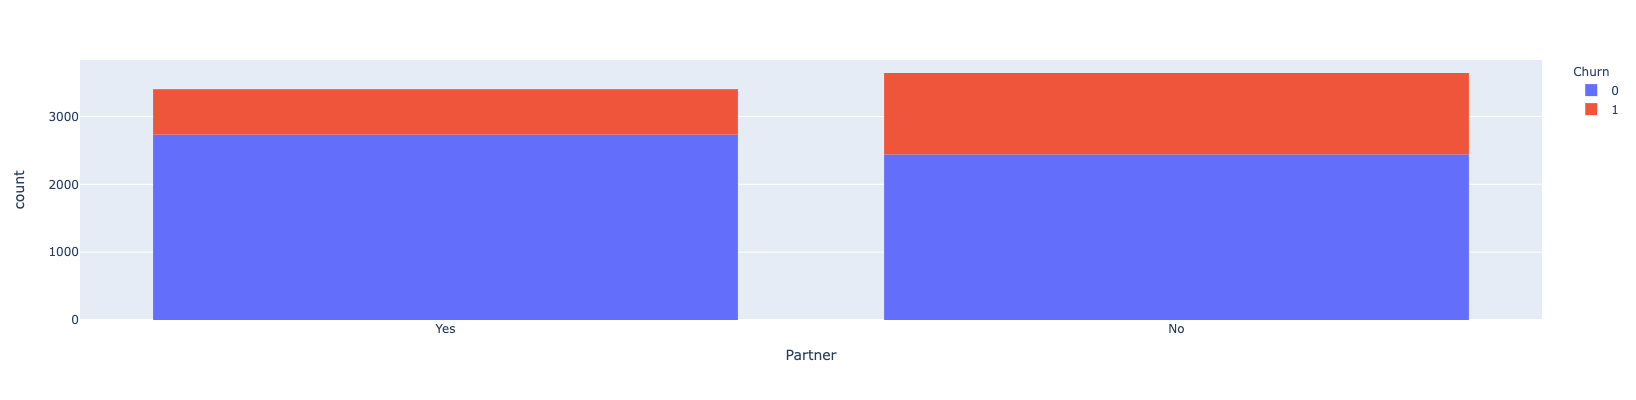

In [100]:
fig = px.histogram(df1, x="Partner", color="Churn",width=400, height=400)
fig.show()

- Customer without any relationship, single customer almost 1.7 times more likely churn than cutomer with a partner.

![](https://media.giphy.com/media/Q9v2RwHugTfz39afpy/giphy.gif)

In [83]:
# Table of partner vs. fraud
partner_churn_count = pd.crosstab(index=df1["Partner"],columns=df1["Churn"])
print(partner_churn_count)

## Probability distribution table 

partner_churn_prob = np.array(partner_churn_count)
partner_churn_prob= partner_churn_prob.astype(float)

for i in range(partner_churn_prob.shape[0]):
    partner_churn_prob[i]=(partner_churn_prob[i]/partner_churn_prob[i].sum())

partner_churn_prob = pd.DataFrame(partner_churn_prob , columns=partner_churn_count.columns ,index = partner_churn_count.index) 

print("\n")
print("Probability distribution table")
print("\n")
print(partner_churn_prob)


#perform the Chi-Square Test of Independence
chi_square_test_statistic, p_value , deg_of_free , Expec_val = stats.chi2_contingency(np.array(partner_churn_count))

# chi square test statistic and p value and Dof
print("\n")
print('chi_square_test_statistic is : ' + str(chi_square_test_statistic))
print("\n")
print('p_value : ' + str(p_value))
print("\n")
print('degree of freedom : ' + str(deg_of_free))
pd.DataFrame(Expec_val) #expected value under H0

Churn       0     1
Partner            
No       2441  1200
Yes      2733   669


Probability distribution table


Churn           0         1
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649


chi_square_test_statistic is : 158.7333820309922


p_value : 2.1399113440759935e-36


degree of freedom : 1


0         1
0  2674.7883  966.2117
1  2499.2117  902.7883

- Since p value < 0.05 , we have sufficient evidence to reject the null hypothesis.

Gif Credit: https://media.giphy.com

### **Having Dependents and Churn**

In [101]:
print (f'A customer with dependents has a probability of {round(df1[df1["Dependents"]=="Yes"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without any dependents has a probability of {round(df1[df1["Dependents"]=="No"]["Churn"].mean()*100,2)} % churn')

print()


A customer with dependents has a probability of 15.45 % churn

A customer without any dependents has a probability of 31.28 % churn



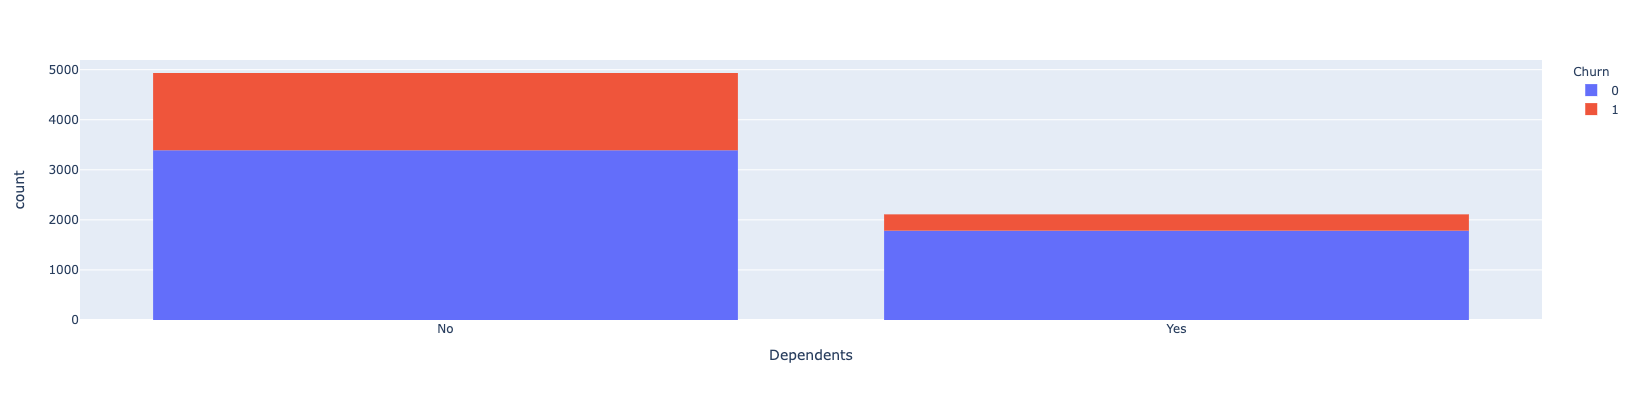

In [102]:
fig = px.histogram(df1, x="Dependents", color="Churn",width=400, height=400)
fig.show()

- Customer without any dependents, almost 2.03 times more likely churn than cutomer with a dependent.

In [84]:
# Table of Dependents vs. fraud
Dependents_churn_count = pd.crosstab(index=df1["Dependents"],columns=df1["Churn"])
print(Dependents_churn_count)

## Probability distribution table 

Dependents_churn_prob = np.array(Dependents_churn_count)
Dependents_churn_prob= Dependents_churn_prob.astype(float)

for i in range(Dependents_churn_prob.shape[0]):
    Dependents_churn_prob[i]=(Dependents_churn_prob[i]/Dependents_churn_prob[i].sum())

Dependents_churn_prob = pd.DataFrame(Dependents_churn_prob , columns=Dependents_churn_count.columns ,index = Dependents_churn_count.index) 

print("\n")
print("Probability distribution table")
print("\n")
print(Dependents_churn_prob)


#perform the Chi-Square Test of Independence
chi_square_test_statistic, p_value , deg_of_free , Expec_val = stats.chi2_contingency(np.array(Dependents_churn_count))

# chi square test statistic and p value and Dof
print("\n")
print('chi_square_test_statistic is : ' + str(chi_square_test_statistic))
print("\n")
print('p_value : ' + str(p_value))
print("\n")
print('degree of freedom : ' + str(deg_of_free))
pd.DataFrame(Expec_val) #expected value under H0

Churn          0     1
Dependents            
No          3390  1543
Yes         1784   326


Probability distribution table


Churn              0         1
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502


chi_square_test_statistic is : 189.12924940423474


p_value : 4.9249216612154196e-43


degree of freedom : 1


0            1
0  3623.930427  1309.069573
1  1550.069573   559.930427

- Since p value < 0.05 , we have sufficient evidence to reject the null hypothesis.

### **Phone Service and Churn**

In [103]:
print (f'A customer with a phone service has a probability of {round(df1[df1["PhoneService"]=="Yes"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without any phone service has a probability of {round(df1[df1["PhoneService"]=="No"]["Churn"].mean()*100,2)} % churn')

print()


A customer with a phone service has a probability of 26.71 % churn

A customer without any phone service has a probability of 24.93 % churn



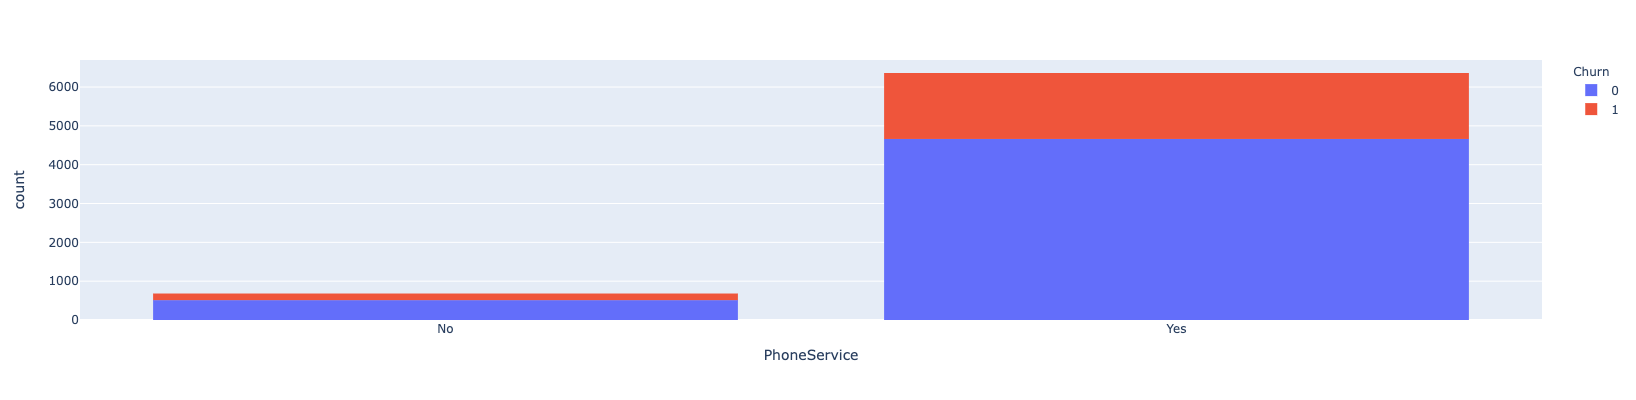

In [104]:
fig = px.histogram(df1, x="PhoneService", color="Churn",width=400, height=400)
fig.show()

- Churn rate difference between customer has a phone service with the company and customer does not have a home phone service with the company is very small.

In [87]:
# Table of PhoneService vs. fraud
PhoneService_churn_count = pd.crosstab(index=df1["PhoneService"],columns=df1["Churn"])
print(PhoneService_churn_count)

## Probability distribution table 

PhoneService_churn_prob = np.array(PhoneService_churn_count)
PhoneService_churn_prob= PhoneService_churn_prob.astype(float)

for i in range(PhoneService_churn_prob.shape[0]):
    PhoneService_churn_prob[i]=(PhoneService_churn_prob[i]/PhoneService_churn_prob[i].sum())

PhoneService_churn_prob = pd.DataFrame(PhoneService_churn_prob , columns=PhoneService_churn_count.columns ,index = PhoneService_churn_count.index) 

print("\n")
print("Probability distribution table")
print("\n")
print(PhoneService_churn_prob)


#perform the Chi-Square Test of Independence
chi_square_test_statistic, p_value , deg_of_free , Expec_val = stats.chi2_contingency(np.array(PhoneService_churn_count))

# chi square test statistic and p value and Dof
print("\n")
print('chi_square_test_statistic is : ' + str(chi_square_test_statistic))
print("\n")
print('p_value : ' + str(p_value))
print("\n")
print('degree of freedom : ' + str(deg_of_free))
pd.DataFrame(Expec_val) #expected value under H0

Churn            0     1
PhoneService            
No             512   170
Yes           4662  1699


Probability distribution table


Churn                0         1
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096


chi_square_test_statistic is : 0.9150329892546948


p_value : 0.3387825358066928


degree of freedom : 1


0            1
0   501.017748   180.982252
1  4672.982252  1688.017748

### **Multiple Lines and Churn**

In [105]:
df1['MultipleLines']= df1['MultipleLines'].replace('No phone service','No')

In [89]:
print (f'A customer with a multiple lines has a probability of {round(df1[df1["MultipleLines"]=="Yes"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without multiple lines has a probability of {round(df1[df1["MultipleLines"]=="No"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without multiple lines has a probability of {round(df1[df1["MultipleLines"]=="No phone service"]["Churn"].mean()*100,2)} % churn')

print()


A customer with a multiple lines has a probability of 28.61 % churn

A customer without multiple lines has a probability of 25.04 % churn

A customer without multiple lines has a probability of 24.93 % churn



In [90]:
fig = px.histogram(df1, x="MultipleLines", color="Churn",width=400, height=400)
fig.show()

- Churn rate difference between customer has a multiple lines phone service with the company and customer does not have a multiple line phone service with the company is very small.

In [88]:
# Table of MultipleLines vs. fraud
MultipleLines_churn_count = pd.crosstab(index=df1["MultipleLines"],columns=df1["Churn"])
print(MultipleLines_churn_count)

## Probability distribution table 

MultipleLines_churn_prob = np.array(MultipleLines_churn_count)
MultipleLines_churn_prob= MultipleLines_churn_prob.astype(float)

for i in range(MultipleLines_churn_prob.shape[0]):
    MultipleLines_churn_prob[i]=(MultipleLines_churn_prob[i]/MultipleLines_churn_prob[i].sum())

MultipleLines_churn_prob = pd.DataFrame(MultipleLines_churn_prob , columns=MultipleLines_churn_count.columns ,index = MultipleLines_churn_count.index) 

print("\n")
print("Probability distribution table")
print("\n")
print(MultipleLines_churn_prob)


#perform the Chi-Square Test of Independence
chi_square_test_statistic, p_value , deg_of_free , Expec_val = stats.chi2_contingency(np.array(MultipleLines_churn_count))

# chi square test statistic and p value and Dof
print("\n")
print('chi_square_test_statistic is : ' + str(chi_square_test_statistic))
print("\n")
print('p_value : ' + str(p_value))
print("\n")
print('degree of freedom : ' + str(deg_of_free))
pd.DataFrame(Expec_val) #expected value under H0

Churn                0    1
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850


Probability distribution table


Churn                    0         1
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099


chi_square_test_statistic is : 11.33044148319756


p_value : 0.0034643829548773


degree of freedom : 2


0           1
0  2490.396138  899.603862
1   501.017748  180.982252
2  2182.586114  788.413886

### **Internet Service and Churn**

In [91]:
print (f'A customer with a Fiber Optic internet service has a probability of {round(df1[df1["InternetService"]=="Fiber optic"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer with a DSL internet service has a probability of {round(df1[df1["InternetService"]=="DSL"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without any internet service has a probability of {round(df1[df1["InternetService"]=="No"]["Churn"].mean()*100,2)} % churn')

print()


A customer with a Fiber Optic internet service has a probability of 41.89 % churn

A customer with a DSL internet service has a probability of 18.96 % churn

A customer without any internet service has a probability of 7.4 % churn



In [92]:
fig = px.histogram(df1, x="InternetService", color="Churn",width=400, height=400)
fig.show()

In [94]:
# Table of MultipleLines vs. fraud
InternetService_churn_count = pd.crosstab(index=df1["InternetService"],columns=df1["Churn"])
print(InternetService_churn_count)

## Probability distribution table 

InternetService_churn_prob = np.array(InternetService_churn_count)
InternetService_churn_prob= InternetService_churn_prob.astype(float)

for i in range(InternetService_churn_prob.shape[0]):
    InternetService_churn_prob[i]=(InternetService_churn_prob[i]/InternetService_churn_prob[i].sum())

InternetService_churn_prob = pd.DataFrame(InternetService_churn_prob , columns=InternetService_churn_count.columns ,index = InternetService_churn_count.index) 

print("\n")
print("Probability distribution table")
print("\n")
print(InternetService_churn_prob)


#perform the Chi-Square Test of Independence
chi_square_test_statistic, p_value , deg_of_free , Expec_val = stats.chi2_contingency(np.array(InternetService_churn_count))

# chi square test statistic and p value and Dof
print("\n")
print('chi_square_test_statistic is : ' + str(chi_square_test_statistic))
print("\n")
print('p_value : ' + str(p_value))
print("\n")
print('degree of freedom : ' + str(deg_of_free))
pd.DataFrame(Expec_val) #expected value under H0

Churn               0     1
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


Probability distribution table


Churn                   0         1
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


chi_square_test_statistic is : 732.309589667794


p_value : 9.571788222840544e-160


degree of freedom : 2


0           1
0  1778.539543  642.460457
1  2274.414880  821.585120
2  1121.045577  404.954423

- Customer with fiber optic internet with the company compare to customer without any internet service with the company **5.66 times** more likely to churn.
- Customer with fiber optic internet with the company compare to customer with DSL internet service with the company almost **2.21 times** more likely to churn.
- Customer with DSL internet service with the company compare to customer without any internet service with the company **2.56 times** more likley to churn.

### **Online Security and Churn**

In [95]:
df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')

In [98]:
print (f'A customer with a online security has a probability of {round(df1[df1["OnlineSecurity"]=="Yes"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without any online security has a probability of {round(df1[df1["OnlineSecurity"]=="No"]["Churn"].mean()*100,2)} % churn')

print()


A customer with a online security has a probability of 14.61 % churn

A customer without any online security has a probability of 31.33 % churn



In [99]:
fig = px.histogram(df1, x="OnlineSecurity", color="Churn",width=400, height=400)
fig.show()

In [100]:
# Table of MultipleLines vs. fraud
OnlineSecurity_churn_count = pd.crosstab(index=df1["OnlineSecurity"],columns=df1["Churn"])
print(OnlineSecurity_churn_count)

## Probability distribution table 

OnlineSecurity_churn_prob = np.array(OnlineSecurity_churn_count)
OnlineSecurity_churn_prob= OnlineSecurity_churn_prob.astype(float)

for i in range(OnlineSecurity_churn_prob.shape[0]):
    OnlineSecurity_churn_prob[i]=(OnlineSecurity_churn_prob[i]/OnlineSecurity_churn_prob[i].sum())

OnlineSecurity_churn_prob = pd.DataFrame(OnlineSecurity_churn_prob , columns=OnlineSecurity_churn_count.columns ,index = OnlineSecurity_churn_count.index) 

print("\n")
print("Probability distribution table")
print("\n")
print(OnlineSecurity_churn_prob)


#perform the Chi-Square Test of Independence
chi_square_test_statistic, p_value , deg_of_free , Expec_val = stats.chi2_contingency(np.array(OnlineSecurity_churn_count))

# chi square test statistic and p value and Dof
print("\n")
print('chi_square_test_statistic is : ' + str(chi_square_test_statistic))
print("\n")
print('p_value : ' + str(p_value))
print("\n")
print('degree of freedom : ' + str(deg_of_free))
pd.DataFrame(Expec_val) #expected value under H0

Churn              0     1
OnlineSecurity            
No              3450  1574
Yes             1724   295


Probability distribution table


Churn                  0         1
OnlineSecurity                    
No              0.686704  0.313296
Yes             0.853888  0.146112


chi_square_test_statistic is : 205.63310416062058


p_value : 1.2320984831180024e-46


degree of freedom : 1


0            1
0  3690.781769  1333.218231
1  1483.218231   535.781769

- A customer with an online security service with the company almost **2.14 times** less likely to leave the company than a customer without any online security service with the company.

### **Online Backup and Churn**

In [101]:
print (f'A customer with a online backup has a probability of {round(df1[df1["OnlineBackup"]=="Yes"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without any online backup has a probability of {round(df1[df1["OnlineBackup"]=="No"]["Churn"].mean()*100,2)} % churn')

print()


A customer with a online backup has a probability of 21.53 % churn

A customer without any online backup has a probability of 29.17 % churn



In [102]:
fig = px.histogram(df1, x="OnlineBackup", color="Churn",width=400, height=400)
fig.show()

In [103]:
# Table of MultipleLines vs. fraud
OnlineBackup_churn_count = pd.crosstab(index=df1["OnlineBackup"],columns=df1["Churn"])
print(OnlineBackup_churn_count)

## Probability distribution table 

OnlineBackup_churn_prob = np.array(OnlineBackup_churn_count)
OnlineBackup_churn_prob= OnlineBackup_churn_prob.astype(float)

for i in range(OnlineBackup_churn_prob.shape[0]):
    OnlineBackup_churn_prob[i]=(OnlineBackup_churn_prob[i]/OnlineBackup_churn_prob[i].sum())

OnlineBackup_churn_prob = pd.DataFrame(OnlineBackup_churn_prob , columns=OnlineBackup_churn_count.columns ,index =OnlineBackup_churn_count.index) 

print("\n")
print("Probability distribution table")
print("\n")
print(OnlineBackup_churn_prob)


#perform the Chi-Square Test of Independence
chi_square_test_statistic, p_value , deg_of_free , Expec_val = stats.chi2_contingency(np.array(OnlineBackup_churn_count))

# chi square test statistic and p value and Dof
print("\n")
print('chi_square_test_statistic is : ' + str(chi_square_test_statistic))
print("\n")
print('p_value : ' + str(p_value))
print("\n")
print('degree of freedom : ' + str(deg_of_free))
pd.DataFrame(Expec_val) #expected value under H0

Churn            0     1
OnlineBackup            
No            3268  1346
Yes           1906   523


Probability distribution table


Churn                0         1
OnlineBackup                    
No            0.708279  0.291721
Yes           0.784685  0.215315


chi_square_test_statistic is : 47.260854003612764


p_value : 6.214092807254819e-12


degree of freedom : 1


0            1
0  3389.583416  1224.416584
1  1784.416584   644.583416

- A customer with an online backup service with the company almost **1.35 times** less likely to leave the company than a customer without any online backup service with the company.

### **Device Protection and Churn**

In [104]:
print (f'A customer with a device protection has a probability of {round(df1[df1["DeviceProtection"]=="Yes"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without any device protection has a probability of {round(df1[df1["DeviceProtection"]=="No"]["Churn"].mean()*100,2)} % churn')

print()


A customer with a device protection has a probability of 22.5 % churn

A customer without any device protection has a probability of 28.65 % churn



In [105]:
fig = px.histogram(df1, x="DeviceProtection", color="Churn",width=400, height=400)
fig.show()

- A customer with a device protection service with the company almost **1.27 times** less likely to leave the company than a customer without any a device protection service with the company.

### **Tech Support and Churn**

In [106]:
print (f'A customer with a Tech Support has a probability of {round(df1[df1["TechSupport"]=="Yes"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without any Tech Support has a probability of {round(df1[df1["TechSupport"]=="No"]["Churn"].mean()*100,2)} % churn')

print()


A customer with a Tech Support has a probability of 15.17 % churn

A customer without any Tech Support has a probability of 31.19 % churn



In [107]:
fig = px.histogram(df1, x="TechSupport", color="Churn",width=400, height=400)
fig.show()

- A customer with a Tech Support service with the company almost **2.06 times** less likely to leave the company than a customer without any a Tech Support service with the company.

### **Streaming TV Service and Churn**

In [108]:
print (f'A customer with a Streaming TV service with the company has a probability of {round(df1[df1["StreamingTV"]=="Yes"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without any Streaming TV service with the company has a probability of {round(df1[df1["StreamingTV"]=="No"]["Churn"].mean()*100,2)} % churn')

print()


A customer with a Streaming TV service with the company has a probability of 30.07 % churn

A customer without any Streaming TV service with the company has a probability of 24.33 % churn



In [109]:
fig = px.histogram(df1, x="StreamingTV", color="Churn",width=400, height=400)
fig.show()

- A customer with a Streaming TV service with the company almost **1.24 times** more likely to leave the company than a customer without any a Streaming TV service with the company.

### **Streaming Movies Service and Churn**

In [110]:

print (f'A customer with a Streaming movies service with the company has a probability of {round(df1[df1["StreamingMovies"]=="Yes"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without any Streaming movies service with the company has a probability of {round(df1[df1["StreamingMovies"]=="No"]["Churn"].mean()*100,2)} % churn')

print()

A customer with a Streaming movies service with the company has a probability of 29.94 % churn

A customer without any Streaming movies service with the company has a probability of 24.38 % churn



In [111]:
fig = px.histogram(df1, x="StreamingMovies", color="Churn",width=400, height=400)
fig.show()

- A customer with a Streaming Movies service with the company almost **1.23 times** more likely to leave the company than a customer without any a Streaming movies service with the company.

### **Contract Type & Churn**

In [112]:

print (f'A customer with a Month to month contract has a probability of {round(df1[df1["Contract"]=="Month-to-month"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer with a Two year contract has a probability of {round(df1[df1["Contract"]=="Two year"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer with a One year contract has a probability of {round(df1[df1["Contract"]=="One year"]["Churn"].mean()*100,2)} % churn')

print()

A customer with a Month to month contract has a probability of 42.71 % churn

A customer with a Two year contract has a probability of 2.83 % churn

A customer with a One year contract has a probability of 11.27 % churn



In [113]:
fig = px.histogram(df1, x="Contract", color="Churn",width=400, height=400)
fig.show()

- Great differences based on the contract were seen in the histogram and mean differences.
- Customer with the 2 year contract almost **15.1 times** less likely to churn compare to customer with a monthly contract.
- On the other hand customer with the 1 year contract almost **3.79 times** less likely to churn compare to customer with a monthly contract.

### **Paperless Billing & Churn**

In [114]:

print (f'A customer with a Paperless billing  has a probability of {round(df1[df1["PaperlessBilling"]=="Yes"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer without a Paperless billing has a probability of {round(df1[df1["PaperlessBilling"]=="No"]["Churn"].mean()*100,2)} % churn')

print()


A customer with a Paperless billing  has a probability of 33.57 % churn

A customer without a Paperless billing has a probability of 16.33 % churn



In [115]:
fig = px.histogram(df1, x='PaperlessBilling', color="Churn",width=400, height=400)
fig.show()

- A customer with a paperless billing with the company almost **2.06 times** more likely to leave the company than a customer without a paperless billing with the company.

### **Payment Method & Churn**

In [116]:

print (f'A customer with a Payment method as a Electornic Check has a probability of {round(df1[df1["PaymentMethod"]=="Electronic check"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer with a Payment method as a Mailed Check has a probability of {round(df1[df1["PaymentMethod"]=="Mailed check"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer with a Payment method as a Bank transfer (automatic) has a probability of {round(df1[df1["PaymentMethod"]=="Bank transfer (automatic)"]["Churn"].mean()*100,2)} % churn')

print()

print (f'A customer with a Payment method as a Credit card (automatic) has a probability of {round(df1[df1["PaymentMethod"]=="Credit card (automatic)"]["Churn"].mean()*100,2)} % churn')

print()


A customer with a Payment method as a Electornic Check has a probability of 45.29 % churn

A customer with a Payment method as a Mailed Check has a probability of 19.11 % churn

A customer with a Payment method as a Bank transfer (automatic) has a probability of 16.71 % churn

A customer with a Payment method as a Credit card (automatic) has a probability of 15.24 % churn



In [118]:
fig = px.histogram(df1, x='PaymentMethod', color="Churn",width=400, height=400)
fig.show()

In [119]:
# Table of MultipleLines vs. fraud
PaymentMethod_churn_count = pd.crosstab(index=df1["PaymentMethod"],columns=df1["Churn"])
print(PaymentMethod_churn_count)

## Probability distribution table 

PaymentMethod_churn_prob = np.array(PaymentMethod_churn_count)
PaymentMethod_churn_prob= PaymentMethod_churn_prob.astype(float)

for i in range(PaymentMethod_churn_prob.shape[0]):
    PaymentMethod_churn_prob[i]=(PaymentMethod_churn_prob[i]/PaymentMethod_churn_prob[i].sum())

PaymentMethod_churn_prob = pd.DataFrame(PaymentMethod_churn_prob , columns=PaymentMethod_churn_count.columns ,index =PaymentMethod_churn_count.index) 

print("\n")
print("Probability distribution table")
print("\n")
print(PaymentMethod_churn_prob)


#perform the Chi-Square Test of Independence
chi_square_test_statistic, p_value , deg_of_free , Expec_val = stats.chi2_contingency(np.array(PaymentMethod_churn_count))

# chi square test statistic and p value and Dof
print("\n")
print('chi_square_test_statistic is : ' + str(chi_square_test_statistic))
print("\n")
print('p_value : ' + str(p_value))
print("\n")
print('degree of freedom : ' + str(deg_of_free))
pd.DataFrame(Expec_val) #expected value under H0

Churn                         0     1
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


Probability distribution table


Churn                             0         1
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


chi_square_test_statistic is : 648.1423274814


p_value : 3.6823546520097993e-140


degree of freedom : 3


0           1
0  1134.268919  409.731081
1  1118.107057  403.892943
2  1737.400256  627.599744
3  1184.223768  427.776232

- Almost half of the customers with a payment method as a Electornic Check churn, which is a quite big percentage.

<a id="6"></a>
<font color="Darkblue" size=+1.5><b>Overall Insights</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- **`Gender`** : There is not much difference between gender on the churn rate. We won't include gender into our model.
- **`Partner`** :  Customer without any relationship, single customer almost 1.7 times more likely churn than cutomer with a partner.
- **`Dependents`** : Customer without any dependents, almost 2.03 times more likely churn than cutomer with a dependent.
- **`Phone Service`**: Churn rate difference between customer has a phone service with the company and customer does not have a home phone service with the company is very small. We won't include phone service into our model.
- **`Multiple Lines`** : Churn rate difference between customer has a multiple lines phone service with the company and customer does not have a multiple line phone service with the company is very small.But we'll consider it due to the chi sq test
- **`ìnternet Service`** : Customer with fiber optic internet with the company compare to customer without any internet service with the company 5.66 times more likely to churn.
- **`Online Security`**: A customer with an online security service with the company almost 2.14 times less likely to leave the company than a customer without any online security service with the company.
- **`Online Backup`** A customer with an online backup service with the company almost 1.35 times less likely to leave the company than a customer without any online backup service with the company.
- **`Device Protection`** : A customer with a device protection service with the company almost 1.27 times less likely to leave the company than a customer without any a device protection service with the company.
- **`Tech Support`** : A customer with a Tech Support service with the company almost 2.06 times less likely to leave the company than a customer without any a Tech Support service with the company.
- **`Streaming TV Service`** : A customer with a Streaming TV service with the company almost 1.24 times more likely to leave the company than a customer without any a Streaming TV service with the company.
- **`Streaming Movies Service`** : A customer with a Streaming Movies service with the company almost 1.23 times more likely to leave the company than a customer without any a Streaming movies service with the company.
- **`Contract Type`** : Great differences based on the contract were seen in the histogram and mean differences.
    - Customer with the 2 year contract almost 15.1 times less likely to churn compare to customer with a monthly contract.
    - On the other hand customer with the 1 year contract almost 3.79 times less likely to churn compare to customer with a monthly contract.
- **`Paperless Billing`** : A customer with a paperless billing with the company almost 2.06 times more likely to leave the company than a customer without a paperless billing with the company.
- **`Payment Method`** : Almost half of the customers with a payment method as a Electornic Check churn, which is a quite big percentage.


<a id="8"></a>
<font color="Darkblue" size=+2.5><b>Balanced Random forest</b></font>

In [299]:
accuracy= []
recall =[]
roc_auc= []
precision = []
F1_score = []
Cross_val_score = []

## Importing Data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Data preprocessing

##Dropping column which are not significant
df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()

## Treating missing Values
df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)
imputer = KNNImputer(n_neighbors=3, weights="uniform")
df1['TotalCharges'] = imputer.fit_transform(df1[['TotalCharges']])

## Encoding
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])

df1[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')
df2= pd.get_dummies(df1 ,drop_first=True)

X= df2.drop('Churn', axis=1)
y= df2['Churn']


for col in X.columns:
    col_type = X[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[col] = X[col].astype('category')


           

##Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the balanced random forest model
brf = BalancedRandomForestClassifier(random_state=42)
brf_model = brf.fit(X_train, y_train)

## Prediction and Scores
y_pred = brf_model.predict(X_test)

cross_val_score(brf, X_train, y_train, cv=10 , scoring="recall")

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))
F1_score.append(round(f1_score(y_test, y_pred),4))

Cross_val_score.append((cross_val_score(brf, X_train, y_train, cv=10 , scoring="accuracy")).mean())
Cross_val_score.append((cross_val_score(brf, X_train, y_train, cv=10 , scoring="recall")).mean())
Cross_val_score.append((cross_val_score(brf, X_train, y_train, cv=10 , scoring="roc_auc")).mean())
Cross_val_score.append((cross_val_score(brf, X_train, y_train, cv=10 , scoring="precision")).mean())
Cross_val_score.append((cross_val_score(brf, X_train, y_train, cv=10 , scoring="f1")).mean())

model_names = ['Balanced Random Forest']
metrics = ["Accuracy","Recall","Roc_Auc","Precision","f1_score"]
result_rf = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision , "f1_score" : F1_score}, index=model_names)
print(result_rf)

metrics = ["Accuracy","Recall","Roc_Auc","Precision","f1_score"]
pd.DataFrame({"Cross_val_score" : Cross_val_score} , index = metrics )

                        Accuracy  Recall  Roc_Auc  Precision  f1_score
Balanced Random Forest    0.7492  0.7875   0.7612     0.5256    0.6304


Cross_val_score
Accuracy          0.743408
Recall            0.777633
Roc_Auc           0.827462
Precision         0.507663
f1_score          0.613904

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(brf_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

## Creating pipeline

In [473]:
trf1 = ColumnTransformer([
    ("One_hot_encoding", OneHotEncoder(handle_unknown="ignore" ,sparse=False,drop="first"),[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])],remainder='passthrough')

trf2 = ColumnTransformer([
    ("Missing_value",KNNImputer(n_neighbors=3, weights="uniform"),[21])],remainder='passthrough')

trf3 = BalancedRandomForestClassifier()

In [474]:
pipe=make_pipeline(trf1,trf2,trf3)
pipe

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One_hot_encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Missing_value',
                                                  KNNImputer(n_neighbors=3),
                                                  [21])])),
                ('balancedrandomforestclassifier',
                 BalancedRandomForestClassifier())])

In [475]:
## Helper function

def data_preprocessing(df):
    
    ## Dropping column which are not significant
    df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()

    ## getting missing Values
    df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)
    
    ## Encoding
    le = LabelEncoder()
    
    df1['Churn']=le.fit_transform(df1['Churn'])
    
    df1[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')


    X= df1.drop('Churn', axis=1)
    y= df1['Churn']

    for col in X.columns:
        col_type = X[col].dtype
        if col_type == 'object' or col_type.name == 'category':
            X[col] = X[col].astype('category')

    return X,y


In [481]:
## getting Xand y
X,y = data_preprocessing(df)

## Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test

SeniorCitizen Partner Dependents  tenure     MultipleLines  \
185               0     Yes         No       1  No phone service   
2715              0      No         No      41               Yes   
3825              0     Yes        Yes      52                No   
1807              0      No         No       1                No   
132               0      No         No      67                No   
...             ...     ...        ...     ...               ...   
5522              0      No         No       1                No   
6377              0      No         No       1  No phone service   
5500              0     Yes        Yes      60                No   
2392              0      No         No      20               Yes   
6705              0     Yes        Yes      22                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
185              DSL             No           No               No          No   
2715              No             No           No               No          No   
3825              No             No           No               No          No   
1807     Fiber optic             No           No              Yes          No   
132              DSL             No           No               No         Yes   
...              ...            ...          ...              ...         ...   
5522     Fiber optic             No           No               No          No   
6377             DSL             No          Yes               No         Yes   
5500             DSL            Yes          Yes              Yes          No   
2392     Fiber optic             No           No              Yes          No   
6705             DSL             No           No               No         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
185           No              No  Month-to-month              Yes   
2715          No              No  Month-to-month              Yes   
3825          No              No        Two year               No   
1807          No              No  Month-to-month               No   
132           No              No        Two year               No   
...          ...             ...             ...              ...   
5522          No              No  Month-to-month              Yes   
6377          No             Yes  Month-to-month              Yes   
5500          No              No        Two year               No   
2392         Yes              No  Month-to-month              Yes   
6705          No              No  Month-to-month              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  
185            Electronic check           24.80         24.80  
2715  Bank transfer (automatic)           25.25        996.45  
3825               Mailed check           19.35       1031.70  
1807           Electronic check           76.35         76.35  
132   Bank transfer (automatic)           50.55       3260.10  
...                         ...             ...           ...  
5522               Mailed check           70.15         70.15  
6377               Mailed check           44.65         44.65  
5500  Bank transfer (automatic)           60.50       3694.45  
2392    Credit card (automatic)           90.70       1781.35  
6705           Electronic check           51.10       1232.90  

[2113 rows x 17 columns]

In [477]:
pipe.fit(X_train,y_train)
pipe.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

## Pickling the model 

In [478]:
import pickle
with open("trained_pipeline-BRF.pkl","wb") as f:
    pickle.dump(pipe,f)

In [479]:
pickled_model = pickle.load(open("trained_pipeline-BRF.pkl","rb"))

In [480]:
pd.DataFrame(pickled_model.predict(X_test)).equals(pd.DataFrame(pipe.predict(X_test))) 

True

- Both the method leads to same results

<a id="7"></a>
<font color="Darkblue" size=+2.5><b>Logistic Regression</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [152]:
X_train  = add_constant(X_train)

logit_model=sm.Logit(y_train,X_train)
model=logit_model.fit()
(model.summary())

Optimization terminated successfully.
         Current function value: 0.417762
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4907
Method:                           MLE   Df Model:                           22
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                  0.2745
Time:                        11:45:52   Log-Likelihood:                -2059.6
converged:                       True   LL-Null:                       -2838.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.3602      1.725      1.368      0.171      -1.020       5.741
SeniorCitizen                             0.2055      0.101      2.041      0.041       0.008       0.403
tenure                                   -0.0558      0.007     -7.793      0.000      -0.070      -0.042
MonthlyCharges                           -0.0634      0.038     -1.665      0.096      -0.138       0.011
TotalCharges                              0.0003   8.19e-05      3.630      0.000       0.000       0.000
Partner_Yes                               0.0092      0.092      0.100      0.921      -0.172       0.190
Dependents_Yes                           -0.1165      0.106     -1.096      0.273      -0.325       0.092
MultipleLines_No phone service           -0.6694      0.779     -0.859      0.390      -2.196       0.857
MultipleLines_Yes                         0.5463      0.212      2.581      0.010       0.131       0.961
InternetService_Fiber optic               2.2918      0.958      2.392      0.017       0.414       4.170
InternetService_No                       -2.3811      0.967     -2.463      0.014      -4.276      -0.487
OnlineSecurity_Yes                       -0.1376      0.214     -0.643      0.520      -0.557       0.282
OnlineBackup_Yes                          0.1070      0.211      0.508      0.611      -0.306       0.520
DeviceProtection_Yes                      0.3015      0.211      1.427      0.154      -0.113       0.716
TechSupport_Yes                           0.0060      0.216      0.028      0.978      -0.417       0.429
StreamingTV_Yes                           0.6912      0.392      1.764      0.078      -0.077       1.459
StreamingMovies_Yes                       0.9144      0.392      2.334      0.020       0.146       1.682
Contract_One year                        -0.6173      0.125     -4.942      0.000      -0.862      -0.372
Contract_Two year                        -1.5424      0.215     -7.165      0.000      -1.964      -1.121
PaperlessBilling_Yes                      0.3080      0.088      3.493      0.000       0.135       0.481
PaymentMethod_Credit card (automatic)    -0.0699      0.135     -0.516      0.606      -0.335       0.195
PaymentMethod_Electronic check            0.3219      0.111      2.906      0.004       0.105       0.539
PaymentMethod_Mailed check               -0.0524      0.136     -0.386      0.700      -0.319       0.214
=========================================================================================================
"""

## Assumptions Check 

### Linearity 

In [182]:
# Add logit transform interaction terms (natural log) for continuous variables e.g.. Age * Log(Age)

X_transformed = X_train.copy()
temp = []
num_features = numerical.to_list().copy()
num_features.remove("SeniorCitizen")
num_features.remove("Churn")

for var in num_features :
    X_transformed[f'{var}:Log_{var}'] = X_transformed[var].apply(lambda x: x * np.log(1+x))
    temp.append(f'{var}:Log_{var}')

# Keep columns related to continuous variables
num_features.extend(temp)

# Redefining variables to include interaction terms
X_lt = X_transformed[num_features]

## Training model
logit_model=sm.Logit(y_train,X_lt)
model=logit_model.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.454335
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4924
Method:                           MLE   Df Model:                            5
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                  0.2110
Time:                        13:51:34   Log-Likelihood:                -2239.9
converged:                       True   LL-Null:                       -2838.9
Covariance Type:            nonrobust   LLR p-value:                7.869e-257
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
tenure                               -0.2860      0.037     -7.703      0.000      -0.359      -0.213
MonthlyCharges                       -0.0964      0.013     -7.365      0.000      -0.122      -0.071
TotalCharges                          0.0025      0.001      2.932      0.003       0.001       0.004
tenure:Log_tenure                     0.0542      0.008      6.766      0.000       0.039       0.070
MonthlyCharges:Log_MonthlyCharges     0.0254      0.003      8.458      0.000       0.020       0.031
TotalCharges:Log_TotalCharges        -0.0003   8.95e-05     -3.184      0.001      -0.000      -0.000
=====================================================================================================
"""

- The interaction terms have a p-value of 0.003 (statistically significant since p<0.05), implying that indicating the presence of non-linearity between independent variable and the logit.


## Visualization 

## Tenure vs Y

<Axes: xlabel='tenure', ylabel='Churn'>

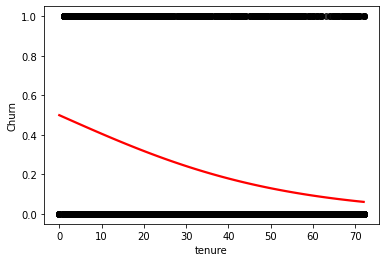

In [187]:
#plot logistic regression curve with black points and red line
sns.regplot(x=X_lt["tenure"], y=y_train, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

Optimization terminated successfully.
         Current function value: 0.417952
         Iterations 8


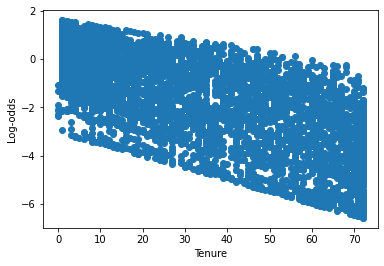

In [189]:
# Re-running logistic regression on the original set of X and y variables
logit_model=sm.Logit(y_train,X_train)
model=logit_model.fit()
predicted = model.predict(X_train)

# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor variable vs logit values for Age
plt.scatter(x=X_lt["tenure"].values, y=log_odds)
plt.xlabel("Tenure")
plt.ylabel("Log-odds")
plt.show()

## Monthlycharges Vs Y

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

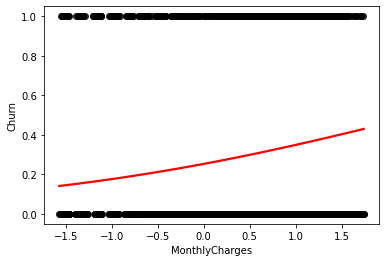

In [259]:
#plot logistic regression curve with black points and red line
sns.regplot(x=X_lt["MonthlyCharges"], y=y_train, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

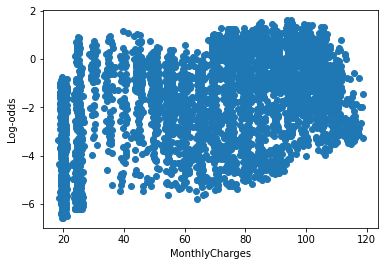

In [195]:
# Visualize predictor variable vs logit values for Age
plt.scatter(x=X_lt["MonthlyCharges"].values, y=log_odds)
plt.xlabel("MonthlyCharges")
plt.ylabel("Log-odds")
plt.show()

## Total Charges vs Y

<Axes: xlabel='TotalCharges', ylabel='Churn'>

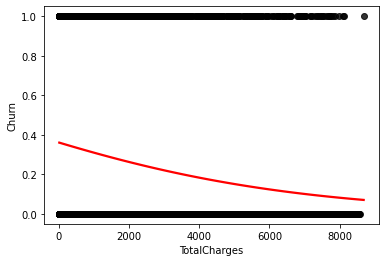

In [193]:
#plot logistic regression curve with black points and red line
sns.regplot(x=X_lt["TotalCharges"], y=y_train, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

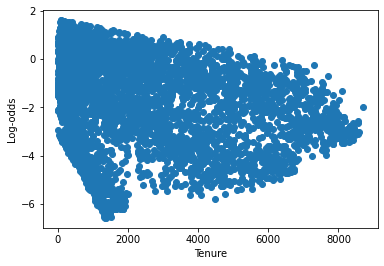

In [191]:
# Visualize predictor variable vs logit values for Age
plt.scatter(x=X_lt["TotalCharges"].values, y=log_odds)
plt.xlabel("TotalCharges")
plt.ylabel("Log-odds")
plt.show()

- We can clearly see nonlinear pattern between the independent and y variable , therefore implying violation of the assumption of the linearity 

## Transformation 

In [256]:
# Applying Box-Cox Transform

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')

X_train_box_cox = pd.DataFrame(pt.fit_transform(X_train[numerical[:-1]]+0.000001) , columns=X_train[numerical[:-1]].columns ).set_index(y_train.index)

pd.DataFrame({'cols':X_train[numerical[:-1]].columns,'box_cox_lambdas':pt.lambdas_})

cols  box_cox_lambdas
0   SeniorCitizen        -0.445809
1          tenure         0.449398
2  MonthlyCharges         0.917772
3    TotalCharges         0.256309

In [257]:
X_train_box_cox,y_train

(      SeniorCitizen    tenure  MonthlyCharges  TotalCharges
 1695      -0.436831  0.891996        0.214429      0.860508
 1095      -0.436831 -1.712521        0.533454     -1.506587
 3889      -0.436831 -0.585084       -1.532285     -1.013593
 3667       2.289215 -0.062363        1.045017      0.397633
 2902       2.289215 -1.068754        0.324938     -0.724557
 ...             ...       ...             ...           ...
 3772      -0.436831 -1.712521        0.995784     -1.445716
 5191      -0.436831 -0.103482        0.871612      0.372923
 5226      -0.436831 -0.643303       -1.465505     -0.931723
 5390       2.289215 -0.643303        1.136957     -0.099636
 860       -0.436831  0.017134       -1.514186     -0.716628
 
 [4930 rows x 4 columns],
 1695    0
 1095    0
 3889    0
 3667    0
 2902    0
        ..
 3772    1
 5191    0
 5226    0
 5390    1
 860     0
 Name: Churn, Length: 4930, dtype: int32)

#### Model fitting with transformed variables

In [246]:
# Re-running logistic regression on the original set of X and y variables
logit_model=sm.Logit(y_train,X_train_box_cox)
model=logit_model.fit()
predicted = model.predict(X_train_box_cox)
model.summary()

Optimization terminated successfully.
         Current function value: 0.586710
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4926
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                -0.01888
Time:                        17:32:45   Log-Likelihood:                -2892.5
converged:                       True   LL-Null:                       -2838.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
SeniorCitizen      0.1995      0.033      6.055      0.000       0.135       0.264
tenure             1.2889      0.223      5.787      0.000       0.852       1.725
MonthlyCharges     1.7851      0.131     13.653      0.000       1.529       2.041
TotalCharges      -2.8035      0.286     -9.790      0.000      -3.365      -2.242
==================================================================================
"""

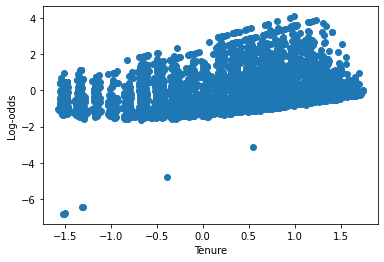

In [252]:
# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor variable vs logit values for Age
plt.scatter(x=X_train_transformed["MonthlyCharges"], y=log_odds)
plt.xlabel("Tenure")
plt.ylabel("Log-odds")
plt.show()

In [258]:
X_train_box_cox

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
1695      -0.436831  0.891996        0.214429      0.860508
1095      -0.436831 -1.712521        0.533454     -1.506587
3889      -0.436831 -0.585084       -1.532285     -1.013593
3667       2.289215 -0.062363        1.045017      0.397633
2902       2.289215 -1.068754        0.324938     -0.724557
...             ...       ...             ...           ...
3772      -0.436831 -1.712521        0.995784     -1.445716
5191      -0.436831 -0.103482        0.871612      0.372923
5226      -0.436831 -0.643303       -1.465505     -0.931723
5390       2.289215 -0.643303        1.136957     -0.099636
860       -0.436831  0.017134       -1.514186     -0.716628

[4930 rows x 4 columns]

In [253]:
# Add logit transform interaction terms (natural log) for continuous variables e.g.. Age * Log(Age)
from sklearn import preprocessing
X_train_box_cox = preprocessing.normalize(X_train_box_cox)
print(X_train_box_cox)


for var in X_train_box_cox.columns :
    X_train_box_cox[f'{var}:Log_{var}'] = X_train_box_cox[var].apply(lambda x: x * np.log(5+x))
    
## Training model
logit_model=sm.Logit(y_train,X_train_box_cox)
model=logit_model.fit()
model.summary()

[[-0.08653412  0.17670015  0.04247728 ...  0.5905432   0.11769928
   0.56519396]
 [-0.08297412 -0.32528582  0.1013272  ... -0.42035629  0.30806215
  -0.40677941]
 [-0.09528297 -0.12762045 -0.33422684 ... -0.26883782 -0.46949853
  -0.3914902 ]
 ...
 [-0.09715714 -0.14307945 -0.32594821 ... -0.29469912 -0.4721539
  -0.37986206]
 [ 0.18319301 -0.05147996  0.09098429 ... -0.10603268  0.32269669
  -0.01998704]
 [-0.11022795  0.00432341 -0.3820829  ...  0.01126112 -0.54121943
  -0.36187034]]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [254]:
X_train_box_cox

array([[-0.08653412,  0.17670015,  0.04247728, ...,  0.5905432 ,
         0.11769928,  0.56519396],
       [-0.08297412, -0.32528582,  0.1013272 , ..., -0.42035629,
         0.30806215, -0.40677941],
       [-0.09528297, -0.12762045, -0.33422684, ..., -0.26883782,
        -0.46949853, -0.3914902 ],
       ...,
       [-0.09715714, -0.14307945, -0.32594821, ..., -0.29469912,
        -0.4721539 , -0.37986206],
       [ 0.18319301, -0.05147996,  0.09098429, ..., -0.10603268,
         0.32269669, -0.01998704],
       [-0.11022795,  0.00432341, -0.3820829 , ...,  0.01126112,
        -0.54121943, -0.36187034]])

<a id="7"></a>
<font color="Darkblue" size=+2.5><b>How Famous Trio (XGBoost & LightGBM & Catboost) Deal Imbalanced Data?</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- In this part, we will look at the CatBoost, XGBoost and LightGBM and will see how they deal imbalanced data internally.
- In general, boosting algorithms do good job even on imbalanced data.
- They produce good results on the imbalanced daata by giving an opportunity to focus more on the minority class and accordingly tune the training algorithm.


- CatBoost, XGBoost and LightGBM use **`scale_pos_weight`** hyperparameter to tune the training algorithm for the imbalanced data.

- **`scale_pos_weight`** is **1** by default.

- Both major class and minority class get the same weight.

- When dealing with imbalanced data, story changes a bit.
- **`scale_pos_weight`** gets the number of ( total number of examples in the majority class divided by the total number of examples in the minority class.)

- For example, in our data;
     - Number of Non-churned customer:  5174
     - Number of Churned customer: 1869
     -  **`scale_pos_weight`** should get 5174 / 1869  which is almost **3**
     
- By adjusting the weight, minority class gets 3 times more impact and 3 times more correction than errors made on the majority class. 

- Two important point, 
    - by changing **`scale_pos_weight`** we can also see changes on the **`recall, accuracy, roc-auc, precision score`**
    - If we use extreme values for the **`scale_pos_weight`**, we can overfit the minority class and model could make worse predictions.



<a id="8"></a>
<font color="Darkblue" size=+2.5><b>CatBoost</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

![](https://avatars.mds.yandex.net/get-bunker/56833/dba868860690e7fe8b68223bb3b749ed8a36fbce/orig)

Image Credit: https://avatars.mds.yandex.net

<a id="9"></a>
<font color="Darkblue" size=+1.5><b>CatBoost (with default Parameters) Deals With Imbalanced Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [129]:
accuracy= []
recall =[]
roc_auc= []
precision = []

model_names =[]

df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])


df1['tenure']= df1['tenure'].astype(float)
df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')


X= df1.drop('Churn', axis=1)
y= df1['Churn']

categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

catboost_base = CatBoostClassifier(verbose=False,random_state=0)

catboost_base.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = catboost_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Catboost_default']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df1

Accuracy  Recall  Roc_Auc  Precision
Catboost_default    0.8074  0.5192    0.717     0.6946

- With the **default parameters, Catboost** get almost**.52 Recall and .72 Roc_Auc**

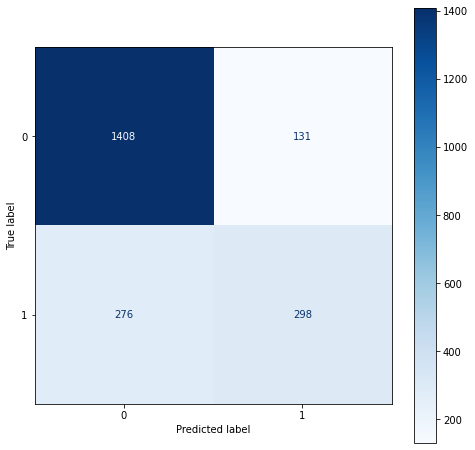

In [130]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(catboost_base, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

- By using deafult value of **`scale_pos_weight`**, **CatBoost** correctly predicted **almost half of the churned customer**
- But model couldn't be able to correctly predict the other half.

<a id="10"></a>
<font color="Darkblue" size=+1.5><b>CatBoost (with adjusted Scale_Pos_Weight = 3) Deals With Imbalanced Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [131]:
accuracy= []
recall =[]
roc_auc= []
precision = []


df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])

df1['tenure']= df1['tenure'].astype(float)
df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')


X= df1.drop('Churn', axis=1)
y= df1['Churn']

categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

catboost = CatBoostClassifier(verbose=False,random_state=0,scale_pos_weight=3)

catboost.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = catboost.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Catboost_adjusted_weight_3']
result_df2 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df2

Accuracy  Recall  Roc_Auc  Precision
Catboost_adjusted_weight_3    0.7534  0.8415    0.781      0.529

- With the adjusted **`scale_pos_weight=3`**, **CatBoost** got  **.84 Recall and .78 Roc_Auc**

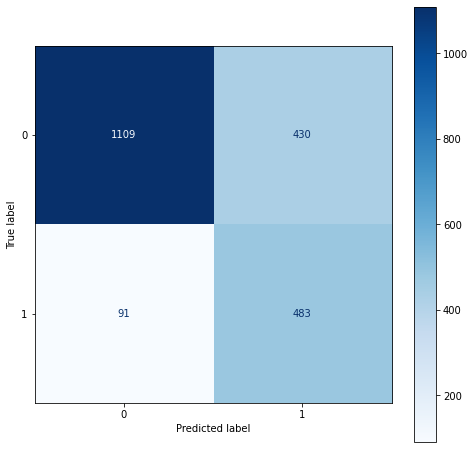

In [132]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(catboost, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

- By using recommended formula for **`scale_pos_weight`**, **CatBoost** correctly predicted **84% of the churned customers**.
- As you have seen that, we didn't change any other parameter and get almost 32% lift in our recall score.

<a id="11"></a>
<font color="Darkblue" size=+1.5><b>CatBoost (with adjusted Scale_Pos_Weight = 5) Deals With Imbalanced Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- For the sake of showing the power of model with a small increase on the weight, let's see the differences on the Recall score and Roc_Auc.
- We will increase **`scale_pos_weight`**  from **3** to **5**.
- Minority class gets 5 times more impact and 5 times more correction than errors made on the majority class. 

In [133]:
accuracy= []
recall =[]
roc_auc= []
precision = []


df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])

df1['tenure']= df1['tenure'].astype(float)
df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')


X= df1.drop('Churn', axis=1)
y= df1['Churn']

categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

catboost_5 = CatBoostClassifier(verbose=False,random_state=0,scale_pos_weight=5)

catboost_5.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = catboost_5.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Catboost_adjusted_weight_5']
result_df3 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df3

Accuracy  Recall  Roc_Auc  Precision
Catboost_adjusted_weight_5    0.6796  0.9181   0.7544     0.4555

- With the adjusted **`scale_pos_weight=5`**, **CatBoost** got  almost **.92 Recall and .75 Roc_Auc**

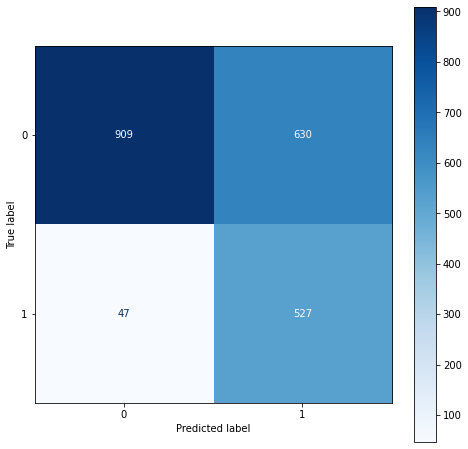

In [134]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(catboost_5, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

- By using weight a little bit higher than recommended formula for **`scale_pos_weight = 5`**, **CatBoost** correctly predict almost **92% of the churned customers**.
- On the other hand we have lost 7% for the precision and 3 points for the Roc_Auc score.

## **SHAP Summary Plot - CatBoost (with adjusted Scale_Pos_Weight = 5 )**

In [135]:
explainercat = shap.TreeExplainer(catboost_5)
shap_values_cat_test = explainercat.shap_values(X_test)
shap_values_cat_train = explainercat.shap_values(X_train)

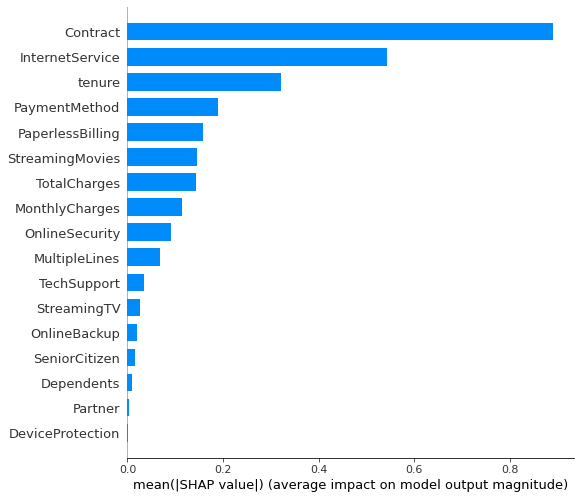

In [136]:
shap.summary_plot(shap_values_cat_train, X_train, plot_type="bar")

<a id="12"></a>
<font color="Darkblue" size=+2.5><b>XGBoost</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

![](https://miro.medium.com/max/1400/1*1kjLMDQMufaQoS-nNJfg1Q.png)

Image Credit: https://miro.medium.com/

<a id="13"></a>
<font color="Darkblue" size=+1.5><b>XGBoost (with default Parameters) Deals With Imbalanced Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [137]:
accuracy= []
recall =[]
roc_auc= []
precision = []


df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])

df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')

df1= pd.get_dummies(df1)
X= df1.drop('Churn', axis=1)
y= df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgbc_base = XGBClassifier(random_state=0)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost_Default']
result_df4 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df4

[05:31:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy  Recall  Roc_Auc  Precision
XGBoost_Default     0.779  0.4704   0.6822     0.6236

- With the **default parameters, XGBoost** get **.47 Recall and .68 Roc_Auc**.

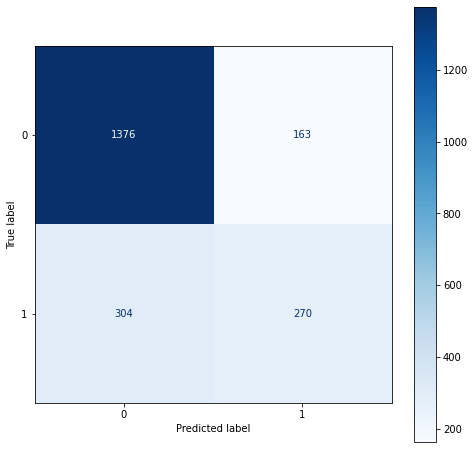

In [138]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(xgbc_base, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

- Bu using deafult value of **`scale_pos_weight`**, **XGBoost** correctly predicted **less than half of the churned customers**. 

<a id="14"></a>
<font color="Darkblue" size=+1.5><b>XGBoost (with adjusted Scale_Pos_Weight = 3) Deals With Imbalanced Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [139]:
accuracy= []
recall =[]
roc_auc= []
precision = []


df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])

df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')

df1= pd.get_dummies(df1)
X= df1.drop('Churn', axis=1)
y= df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgbc_3 = XGBClassifier(random_state=0,scale_pos_weight=3)

xgbc_3.fit(X_train, y_train)
y_pred = xgbc_3.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost_adjusted_weight_3']
result_df5 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df5

[05:31:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy  Recall  Roc_Auc  Precision
XGBoost_adjusted_weight_3    0.7643   0.669   0.7344     0.5549

- With the adjusted **`scale_pos_weight`**, **XGBoost** got almost **.67 Recall and .73 Roc_Auc**

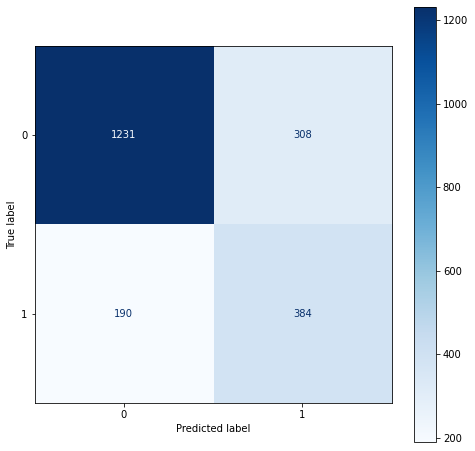

In [140]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(xgbc_3, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

- Bu using recommended adjusted value of **`scale_pos_weight`**, **XGBoost** correctly predicted almost **67% of the churned customers**.

<a id="15"></a>
<font color="Darkblue" size=+1.5><b>XGBoost (with adjusted Scale_Pos_Weight = 5) Deals With Imbalanced Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- For the sake of showing the power of model with a small increase on the weight, let's see the differences on the Recall score and Roc_Auc.
- We will increase **`scale_pos_weight`**  from **3** to **5**.
- Minority class gets 5 times more impact and 5 times more correction than errors made on the majority class. 

In [141]:
accuracy= []
recall =[]
roc_auc= []
precision = []


df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])

df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')

df1= pd.get_dummies(df1)
X= df1.drop('Churn', axis=1)
y= df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgbc_5 = XGBClassifier(random_state=0,scale_pos_weight=5)

xgbc_5.fit(X_train, y_train)
y_pred = xgbc_5.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost_adjusted_weight_5']
result_df6 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df6

[05:31:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy  Recall  Roc_Auc  Precision
XGBoost_adjusted_weight_5    0.7544  0.7422   0.7505     0.5345

- With the adjusted **`scale_pos_weight = 5`**, **XGBoost** got **.74 Recall and .75 Roc_Auc**

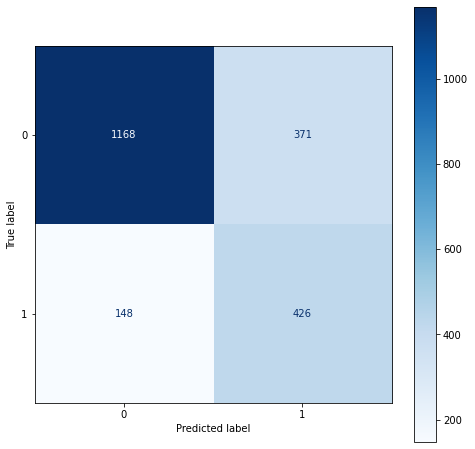

In [142]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(xgbc_5, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

- When we play around a little bit with the value of  **`scale_pos_weight`**, **XGBoost** correctly predicted almost **74% of the churned customers** by using **scale_pos_weight=5** (Roc_Auc = .75)


## **SHAP Summary Plot- XGBoost (with adjusted Scale_Pos_Weight = 5)**

In [143]:
explainerxgbc = shap.TreeExplainer(xgbc_5)
shap_values_XGBoost_test = explainerxgbc.shap_values(X_test)
shap_values_XGBoost_train = explainerxgbc.shap_values(X_train)

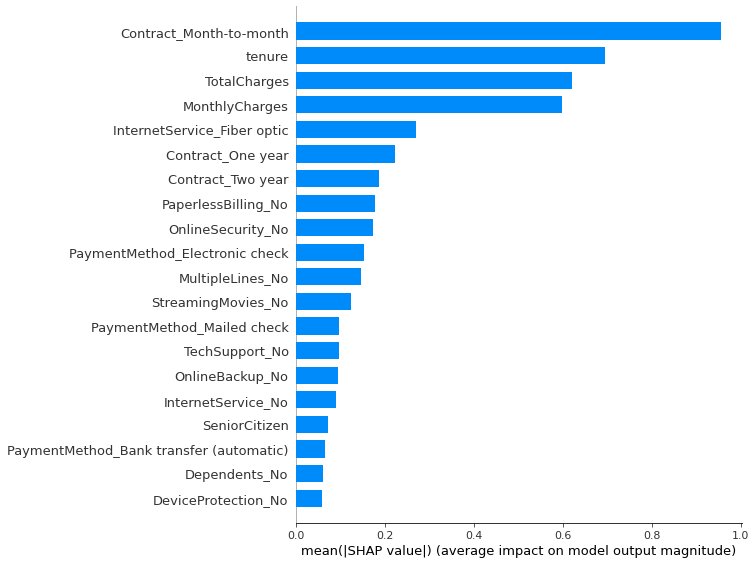

In [144]:
shap.summary_plot(shap_values_XGBoost_train, X_train, plot_type="bar")

<a id="16"></a>
<font color="Darkblue" size=+2.5><b>LightGBM</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

![](https://repository-images.githubusercontent.com/64991887/dc855780-e34b-11ea-9ab8-e08ca33288b0)

Image Credit: https://repository-images.githubusercontent.com/64991887/

<a id="17"></a>
<font color="Darkblue" size=+1.5><b>LightGBM (with default Parameters) Deals With Imbalanced Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [145]:
accuracy= []
recall =[]
roc_auc= []
precision = []


df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])

df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')

df1= pd.get_dummies(df1)
X= df1.drop('Churn', axis=1)
y= df1['Churn']

for col in X.columns:
    col_type = X[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[col] = X[col].astype('category')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lgbmc_base=LGBMClassifier(random_state=0)

lgbmc_base.fit(X_train, y_train,categorical_feature = 'auto',eval_set=(X_test, y_test),feature_name='auto', verbose=0)

y_pred = lgbmc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['LightGBM_default']
result_df7 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df7

Accuracy  Recall  Roc_Auc  Precision
LightGBM_default    0.7998  0.5401   0.7184      0.661

- With the adjusted **`scale_pos_weight`**, **LightGBM** got almost **.54 Recall and .72 Roc_Auc**

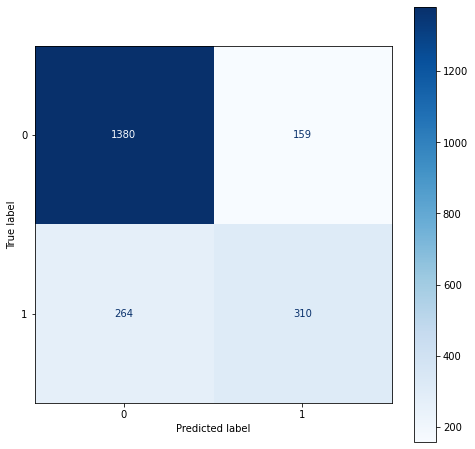

In [146]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lgbmc_base, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

- Bu using deafult value of **`scale_pos_weight`**, **LightGBM** correctly predicted alittle bit more than half of the churned customers. 

<a id="18"></a>
<font color="Darkblue" size=+1.5><b>LightGBM (with adjusted Scale_Pos_Weight =3) Deals With Imbalanced Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [147]:
accuracy= []
recall =[]
roc_auc= []
precision = []


df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])

df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')

df1= pd.get_dummies(df1)
X= df1.drop('Churn', axis=1)
y= df1['Churn']

for col in X.columns:
    col_type = X[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[col] = X[col].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lgbmc_3=LGBMClassifier(random_state=0,scale_pos_weight=3)

lgbmc_3.fit(X_train, y_train,categorical_feature = 'auto',eval_set=(X_test, y_test),feature_name='auto', verbose=0)

y_pred = lgbmc_3.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['LightGBM_adjusted_weight_3']
result_df8 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df8

Accuracy  Recall  Roc_Auc  Precision
LightGBM_adjusted_weight_3     0.761  0.7718   0.7644     0.5422

- With the adjusted **`scale_pos_weight`**, **LightGBM** got **.77 Recall and .76 Roc_Auc**

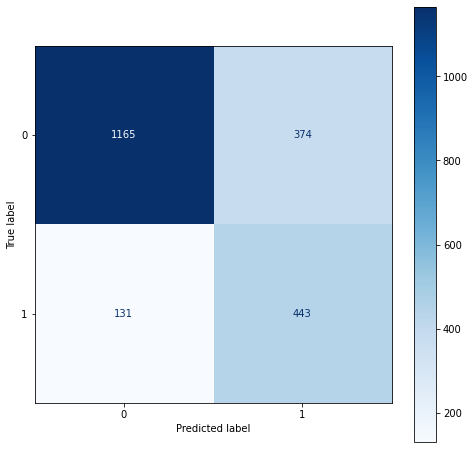

In [148]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lgbmc_3, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

- By using recommended formula for **`scale_pos_weight`**, **LightGBM** correctly predicted almost 77% of the churned customer.
- As you have observed that, we didn't change any other parameter and get almost 23% lift in our recall score without overfitting.
- We can improve this score without destroying the Roc_Auc.

<a id="19"></a>
<font color="Darkblue" size=+1.5><b>LightGBM (with adjusted Scale_Pos_Weight =5) Deals With Imbalanced Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- For the sake of showing the power of model with a small increase on the weight, let's see the differences on the Recall score and Roc_Auc.
- We will increase **`scale_pos_weight`**  from **3** to **5**.
- Minority class gets 5 times more impact and 5 times more correction than errors made on the majority class. 

In [149]:
accuracy= []
recall =[]
roc_auc= []
precision = []


df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])

df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')

df1= pd.get_dummies(df1)
X= df1.drop('Churn', axis=1)
y= df1['Churn']

for col in X.columns:
    col_type = X[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[col] = X[col].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lgbmc_5=LGBMClassifier(random_state=0,scale_pos_weight=5)

lgbmc_5.fit(X_train, y_train,categorical_feature = 'auto',eval_set=(X_test, y_test),feature_name='auto', verbose=0)

y_pred = lgbmc_5.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['LightGBM_adjusted_weight_5']
result_df9 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df9

Accuracy  Recall  Roc_Auc  Precision
LightGBM_adjusted_weight_5    0.7255   0.831   0.7586     0.4969

- With the adjusted **`scale_pos_weight = 5`**, **LightGBM** got **.83 Recall and almost .76 Roc_Auc**

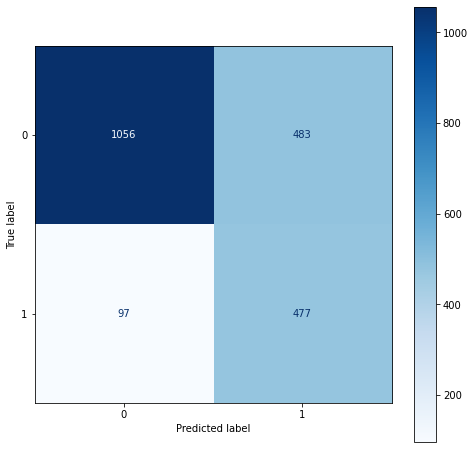

In [150]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lgbmc_5, X_test, y_test, cmap=plt.cm.Blues, ax=ax);

- By using **`scale_pos_weight =5`**, **LightGBM** correctly predicted **83% of the churned customer**.

## **SHAP Summary Plot- LightGBM (with adjusted Scale_Pos_Weight = 5)**

In [151]:
explainerlgbmc = shap.TreeExplainer(lgbmc_5)
shap_values_LightGBM_test = explainerlgbmc.shap_values(X_test)
shap_values_LightGBM_train = explainerlgbmc.shap_values(X_train)

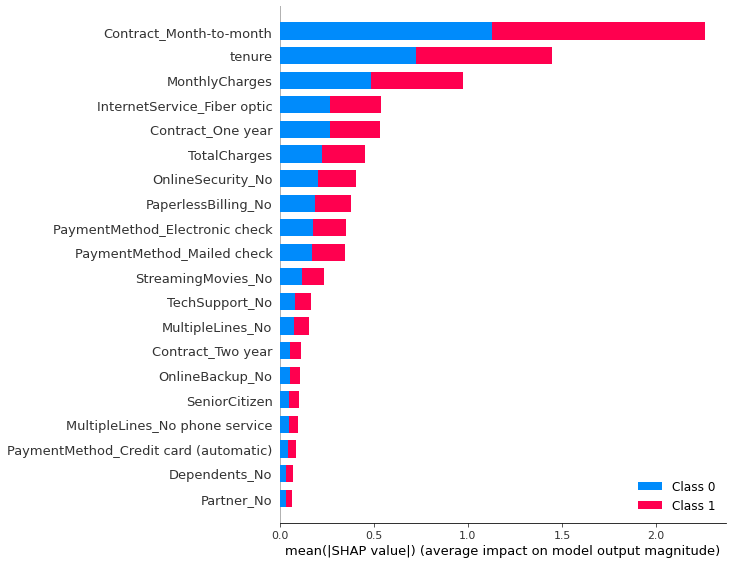

In [152]:
shap.summary_plot(shap_values_LightGBM_train, X_train, plot_type="bar")

<a id="20"></a>
<font color="Darkblue" size=+1.5><b>Final Result Table and Model Comparison</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [153]:
result_final= pd.concat([result_df1,result_df2,result_df3,result_df4,result_df5,result_df6, result_df7,result_df8,result_df9],axis=0)
result_final

Accuracy  Recall  Roc_Auc  Precision
Catboost_default              0.8074  0.5192   0.7170     0.6946
Catboost_adjusted_weight_3    0.7534  0.8415   0.7810     0.5290
Catboost_adjusted_weight_5    0.6796  0.9181   0.7544     0.4555
XGBoost_Default               0.7790  0.4704   0.6822     0.6236
XGBoost_adjusted_weight_3     0.7643  0.6690   0.7344     0.5549
XGBoost_adjusted_weight_5     0.7544  0.7422   0.7505     0.5345
LightGBM_default              0.7998  0.5401   0.7184     0.6610
LightGBM_adjusted_weight_3    0.7610  0.7718   0.7644     0.5422
LightGBM_adjusted_weight_5    0.7255  0.8310   0.7586     0.4969

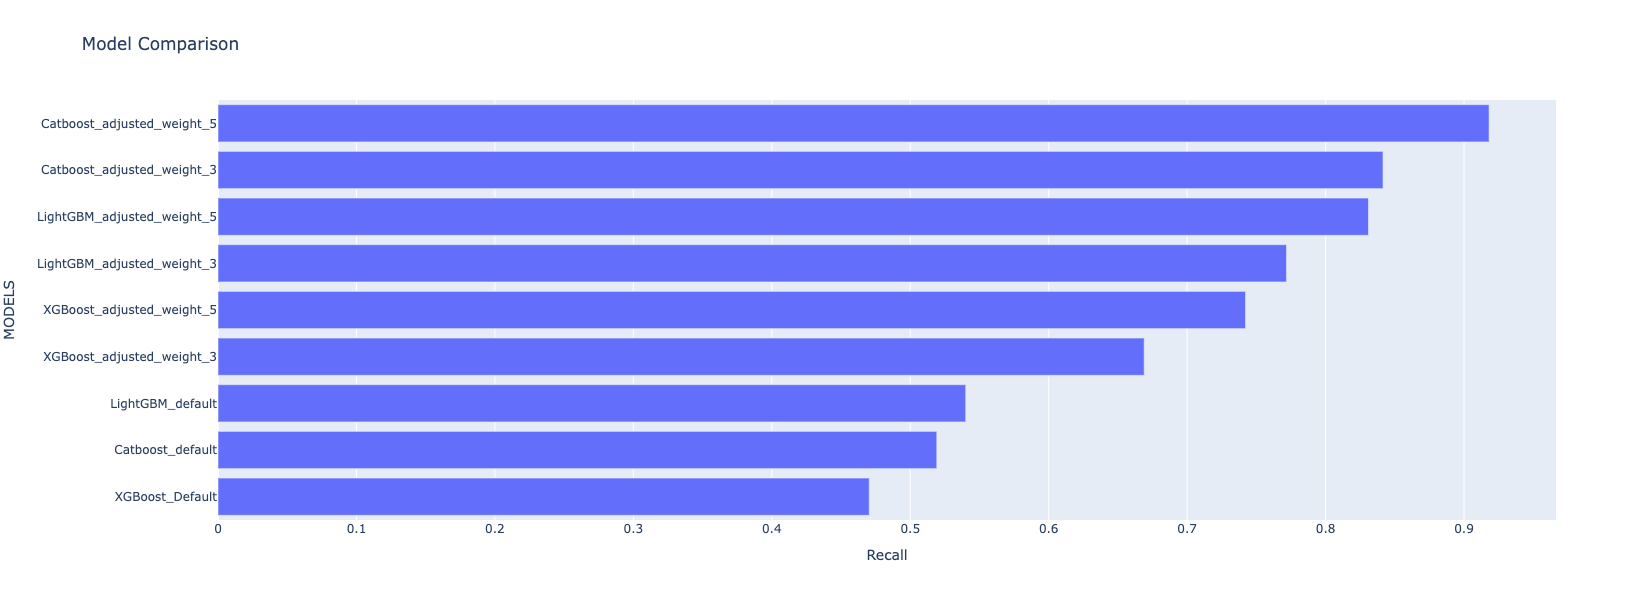

In [154]:
result_final.sort_values(by=['Recall'], ascending=True,inplace=True)
fig = px.bar(result_final, x='Recall', y=result_final.index,title='Model Comparison',height=600,labels={'index':'MODELS'})
fig.show()

<a id="21"></a>
<font color="Darkblue" size=+2.5><b>Conclusion</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In this notebook, we have looked in detail at how famous trio (XGBoost & LightGBM & Catboost) handle the imbalanced data.

- We looked at the CatBoost, XGBoost and LightGBM  and showed how they deal with imbalanced data internally.
- In general, boosting algorithms do good job even on imbalanced data.
- They produce good results on the imbalanced daata by giving an opportunity to focus more on the minority class and accordingly tune the training algorithm.

- CatBoost, XGBoost and LightGBM use **`scale_pos_weight`** hyperparameter to tune the training algrotih for the imbalanced data.

- **`scale_pos_weight`** is **1** by default. Both major class and minority class get the same weight.
- When dealing with imbalanced daya, story changes a bit.
- **`scale_pos_weight`** gets the number of ( total number of examples in the majority class divided by the total number of examples in the minority class.)     
- By adjusting the weight, minority class got 3 times more impact and 3 times more correction than errors made on the majority class. 
- We also observed that when we changed **`scale_pos_weight`** from **3** to **5** , we have observed significant increase on the **`recall`** score.
- Two important point, 
    - by changing **`scale_pos_weight`** we observed changes on the **`recall, accuracy, roc-auc, precision score`**
    - If we use extreme values for the **`scale_pos_weight`**, we can overfit the minority class and model could make worse predictions.


- I have to emphasize that it is important to get deep knowledge on the data and problem on the hand. Based on the stakeholder's / customer's demand and domain knowledge we can make changes accordingly.